**Coursebook: Getting Started with Python**
- Part 1 of _Python Machine Learning Fundamentals_
- Course Length: 24 Hours
- Last Updated: July 2019

___

- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

The coursebook is part of the **Python Machine Learning Fundamentals** prepared by [Algoritma](https://algorit.ma). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

## Training Objectives

On the first section of this **Python Machine Learning Fundamentals**, we'll start by getting used in working with Jupyter Notebook and programming basics. In this coursebook we will cover:

- **Regression Model**
    - Simple Linear Regression
    - Multiple Linear Regression
- **Classification**
    - Binary Logistic Regression
    - K-Nearest Neighbour
    - Evaluating classifier model
- **Clustering Analysis**

By the end of this course, you'll be working on a **Learn-by-Building** module to create a data exploratory analysis project to apply what you have learned on provided dataset and attempt to answer all the given questions. This final part is considered as a Graded Assignment so make sure you do well.

# Introduction to Machine Learning

Machine learning on a very basic level, refers to a sub-field of computer science that “gives computer the ability to learn without being explicitly programmed”. Less-sensationally, it is concerned with the theory and application of statistical and mathematical methods to arrive at a particular objective without following a set of strictly defined and rigid pre-determined rules.

The most common machine learning is divided into two types, namely **supervised learning** and **unsupervised learning**. The difference between the two is that when we talk about **supervised learning** then we talk about predictions of a value because in supervised learning the data we will analyze has a variable target.

When the prediction value is numerical (think oil prices, rainfall, quarterly sales, blood pressure etc), it is generally referred to as a “regression” problem. This is in contrast with “classification” problems, a general term for when the value we’re trying to predict is categorical (loan defaults, email spam collection, handwriting recognition etc).

Whereas if we talk about **unsupervised learning** then we talk about data exploration because the data we want to process doesn't have a variable target. The method usually used to analyze a data using unsupervised learning is clustering or data grouping.


# Regression Model

First of all we want to learn about machine learning is about regression model. So let’s try and achieve some intuition about this important concept through the following illustration. I’m going to ahead and load some data and create a histogram from the resulting data.

It is important here to remind you that regression models are not just used in the machine learning context for numeric prediction. Regression, in fact, represent the “workhorse of data science”1 and is among the most practical and theoretically understood models in statistics. Data scientists well trained with this foundation will be able “to solve an incredible array of problems”2. Because regression models often lead to highly interpretable models, we can (and should) consider them as a handy statistical tool that has its place in some of the most common data science tasks:

- **Prediction**: Predict the profitability of a new product category given its pilot launch sales figure
- **Statistical Modeling**: Determining a quantitative relationship between price sensitivity and average sales unit
- **Covariation**: Determining the (residual) variation in average sales unit that appears unrelated to price levels; and to investigate the impact of other external factors beyond price points in explaining the fluctuation of average sales unit

## Simple Linear Regression

### Least Square Regression

One of the terms you’ll hear a lot in this course is about linear regression. So let’s try and achieve some intuition about this important concept through the following illustration. I’m going to ahead and load some data and create a histogram from the resulting data.

The data, as some among us may recall, is from an online retailer that specialize in the trading of office supplies and stationery:

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

%matplotlib inline

In [2]:
copymachines = pd.read_csv("data_input/copiers.csv")
copymachines = copymachines.sample(frac=1).reset_index(drop=True)
copymachines.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Segment,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
0,407,CA-2017-117457,12/8/17,12/12/17,Standard Class,KH-16510,Consumer,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913
1,5069,CA-2014-124478,8/8/14,8/12/14,Standard Class,MA-17560,Home Office,TEC-CO-10001571,Technology,Copiers,Sharp 1540cs Digital Laser Copier,549.990,1,0.0,274.9950
2,3274,CA-2017-133865,5/8/17,5/12/17,Standard Class,PS-19045,Home Office,TEC-CO-10001046,Technology,Copiers,Canon Imageclass D680 Copier / Fax,3359.952,6,0.2,1049.9850
3,6201,CA-2015-146675,4/16/15,4/20/15,Standard Class,SB-20185,Consumer,TEC-CO-10001766,Technology,Copiers,Canon PC940 Copier,1439.968,4,0.2,485.9892
4,7037,CA-2014-124618,5/2/14,5/4/14,Second Class,CS-11860,Consumer,TEC-CO-10004202,Technology,Copiers,Brother DCP1000 Digital 3 in 1 Multifunction M...,479.984,2,0.2,89.9970


While the sales variable take on a rather large value (with an outlier at $5000), the idea of a least squares estimate is to identify a point in our data that minimizes the sum of the squared distances between the observed data and itself. We’ll observe later that, with no predictor variables, this least squares estimate is the sample average.

Because our estimation model isn’t going to predict every observation perfectly, minimizing the average (which is equivalent to: the sum) of squared errors seem like a reasonable thing to do. If we had minimize the average absolute deviation between the data, it would lead us to the median as the least squares estimate instead of the mean. While this may seem intuitive to some, I am counting on some of you to be skeptical enough as to question me on whether the sample average would in fact lead us to the least squares estimate.

Let’s explain the importance of least squares in the context of regression models. Before I create a scatterplot of the sales data, I’d remove the far outlier (the one close to $5000) from our sample data and treat it as noise. Do note that removing outlying data (or in the general treatment of outliers) is not a decision to be taken lightly and generally involve a more methodical and lengthier treatment with respect to its implications. If done poorly, you may even be guilty of “doctoring” the data to fit your pre-determined narrative.

In [ ]:
# code to plot Profit and Sales

In this case, without diverting too far from the subject matter of this workshop, I think you can agree that the decision is well-justified. Another useful way to think about this particular decision in this case is to consider the following trade-off:

> Do we want the presence of a numerically distant observation (potentially < ~1% of total observations) at the expense of “poorer model fit” for the rest (99%) of the observation?

To refresh your memory, recall from your Practical Statistics class that the box plot identify an observation as an outlier if it’s positioned above or below either of its “whiskers”. That, we learned is 1.5 times the interquartile range above the upper quartile and bellow the lower quartile. Let’s draw a box plot of our variable of interest:

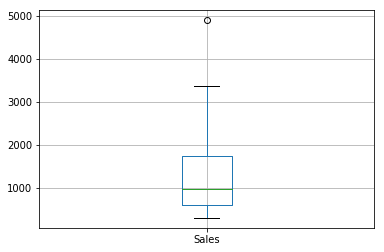

In [8]:
copymachines.boxplot(column = ['Sales'])

Eliminating the outlier data from our original sample, we can now plot Sales against Profit and attain the following graph:

In [ ]:
# code plot of sales without outlier

We can see a fairly linear relationship between the Sales and Profit variables of our `copymachines` dataset, and the objective of a simple linear regression is concerned with modeling that relationship with a straight line.

### Simple Linear Regression

Create a linear model in Python is as convenient as you’d wish it to be. We will call the `LinearRegression()` function and specify two parameters: the `x_data` for our linear model and `y_data` from which our model is built from.

But before we build simple linear regression model, the `copymachines` data will split into train and test data. We given train dataset by 80% of `copymachines` datas and the test dataset given by 20%  of `copymachines` datas. 

In [10]:
round(copymachines.shape[0]*0.8)

50

In [11]:
X_train = copymachines.Sales[:50]
X_train.tail()

45     839.988
46     439.992
47     879.984
48     899.970
49    2799.944
Name: Sales, dtype: float64

In [18]:
np.random.seed(100)
sel = round(copymachines.shape[0]*0.8)

x_train = copymachines.Sales[:sel]
x_test = copymachines.Sales[sel:]

y_train = copymachines.Profit[:sel]
y_test = copymachines.Profit[sel:]

> You could also have used several built-in scikit-learn functions for the shuffling task. An example of achieving this effect is the `shuffle()` function:

    from sklearn.utils import shuffle
    df = shuffle(df)

In [19]:
print(np.array(x_train))
print(x_train.shape)

[1199.976  549.99  3359.952 1439.968  479.984  899.982  719.976 1999.96
  639.968 2399.96   439.992  479.984 1199.96   549.99   599.99   959.984
  599.98  1199.98  1799.97  2999.95   959.984  479.976  479.984  959.984
 2879.952 1439.976 1999.96  2799.96  1119.984  479.984 2399.96   319.984
 1199.976 2799.96   999.98  1399.98  1199.976  879.984 4899.93   799.984
 1199.976  479.976 1799.97   299.99   559.992  839.988  439.992  879.984
  899.97  2799.944]
(50,)


`sklearn` expect our x to be a 2-dimensional array and would throw an Exception otherwise, so we'll reshape the data to have two dimension, the second being `1` for the single column feature:

In [20]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
print(x_train.shape)

(50, 1)


We'll create our linear regressor object ("model") and fit the model to our training data.

In [21]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Notice that we’ve saved `lm` as a linear model and we can now use the attributes of `lm`, such as its  coefficients to create our linear model by its `intercept` and `coef_`

In [22]:
print(lm.intercept_)
print(lm.coef_)

-91.84350669944604
[0.40563133]


And with that let’s create our plot again, but this time we’ll also add a line that intercepts the y-axis at -91.8435 and have a slope of 0.4056 degree, just as the coefficients of our model:

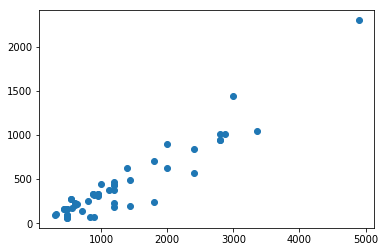

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)

Now that we have the coefficients, what does that tell us? Well the size of the coefficients tell us the effect that variable has on our target variable. We observed here that Sales have a coefficient of 0.4056 on Profit, and because 0.4056 is a positive number we know that the effect is positive: the higher the Sales, the higher the Profit. A negative coefficient will indicate the opposite, and an example of that would be Profit vs Market Saturation: the increasingly saturated market leads to decreasing profit.

Can you think of another example where we might observe a negative coefficient in a regression model?

In addition to the above information, we’ve also derived the profit equation from our linear model directly. It takes the form:

$\hat Y=β_0+β_1X_1$

Which in plain English means: Estimated Profit = Intercept + Slope * Sales

Substituting the beta coefficients into the formula hence yield: Estimated Profit = -91.8435066994 + 0.40563133 * Sales

That tells us that the profit is expected to increase by $0.4056$ when the sales price of our Copiers machine increase by $1$, and decrease by $0.4056$ as the sales price of our Copiers machine decrease by $1$. For a Copiers machine with a listed price of $0$, the profit is predicted to be negative (incurring a loss of approximately $-91.84$).

Supposed we’re expecting a sales transaction by the end of day amount $1,000$. What would our linear model predict its profit to be?

In [26]:
-91.8435066994 + 0.40563133 *1000

313.7878233006

It turns out that our linear model, `lm` would predict a profit of $313.7878$. Not too bad! However, Python has built-in functions such as `*.predict()` that allow us to obtain predictions given some input data. predict expects a machine learning model as its first parameter, and in this case a data frame to predict on. We already have the model object (“lm”) so let’s create the new data for us to work with.

We can use the test data to predict Profit by its model.

In [24]:
pred = lm.predict(x_test)
pred[:5]

array([ 102.85304241, 1125.03020681, 1043.90799679,  346.22859638,
        516.58320927])

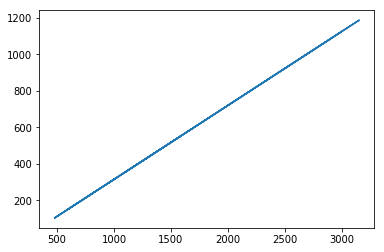

In [25]:
plt.plot(x_test, pred)

#### R-Squared

R squared by definition is the percentage of the total variability that is explained by the linear relationship with the predictor (Regression Variation / Total Variation):

$R^2=\frac {∑ \limits_{i=1}^n (Y_i−\bar Y)^2}{∑ \limits_{i=1}^n(Y_i−\bar Y)^2}$

In other words, R squared can be thought of as a quantity that represents the % of the total variation that’s represented by the model. We simply take the regression variation and divide it by the total variation. In our case, it is the % of the variation in profit that is explained by the regression relationship with sales. Some facts about $R^2$:
- $R^2$ is the percentage of variation explained by the regression model
- 0 ≤ $R^2$ ≤ 1
- If we define R as the sample correlation between the predictor and the outcome, $R^2$ is simply the sample correlation squared

Because R-squared is a statistical measure of how close the data are to the fitted line, we want our model to achieve a high R-squared as it means our model has fit the data well (not always the case, but we’ll get to that later).


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

sqrt(mean_squared_error(y_test, pred))

166.90383503000325

In [40]:
# code to get R-Squared
r2_score(y_test, pred)

0.8858190158603508

## Multiple Linear Regression

Let’s build another regression model to solidify our understanding of regression models. Earlier on, we predict a future value of y given one input, x. Recall the y in our first example is the Profit and our x is the number of Sales. 

Also recall that because the number of profit depend on the number of sales, this y we’re working with is often referred to as dependent variable while the x are referred to as, you guessed it, independent variables. Can a regression model contain more than one dependent variable? Absolutely!

In the following code we take a peek at a dataset used by criminologists to study the effect of punishment regimes on crime rates. We’ll read the dataset and rename the columns. 

In [37]:
crime = pd.read_csv("crime.csv")
crime = crime.sample(frac=1).reset_index(drop=True)
crime.head()

# code for rename colnames of crime data

,Unnamed: 0,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
0,25,130,0,116,63,57,641,984,14,26,70,21,486,196,0.069197,21.9003,523
1,33,147,1,104,63,64,560,972,23,95,76,24,462,233,0.049499,25.5005,1072
2,16,142,1,88,81,77,497,956,33,321,116,47,427,247,0.052099,26.0991,946
3,2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
4,15,152,1,87,57,53,530,986,30,72,92,43,405,264,0.069100,22.7008,798


The dataset was collected in 1960 and a full description of the dataset wasn’t conveniently available. I use the description I gathered from the authors of the MASS package. After you rename the dataset (in your coursebook, around line 410 to line 420), the variables are:
- `percent_m`: percentage of males aged 14-24 - is_south: whether it is in a Southern state. 1 for Yes, 0 for No.
- `mean_education`: mean years of schooling
- `police_exp60`: police expenditure in 1960
- `police_exp59`: police expenditure in 1959 - labour_participation: labour force participation rate
- `m_per1000f`: number of males per 1000 females
- `state_pop`: state population
- `nonwhites_per1000`: number of non-whites resident per 1000 people
- `unemploy_m24`: unemployment rate of urban males aged 14-24
- `unemploy_m39`: unemployment rate of urban males aged 35-39
- `gdp`: gross domestic product per head
- `inequality`: income inequality
- `prob_prison`: probability of imprisonment
- `time_prison`: avg time served in prisons
- `crime_rate`: crime rate in an unspecified category 


   In this part we want to predict `inequality` by `gdp` and `mean_education`.

In [ ]:
# code linear regression of inequality~gdp+mean_education

### Adjusted R-Squared

Using R-squared itself can be misleading in our assessment of the model fit and this is due to the one of the key limitation of this metric. R-squared, it turns out increases with every new addition of a predictor variable, even if it turns out that the variable is just completely random number - the R-squared does not decrease. As a result, a model with more independent variables may appear to have a better fit just on the merit of having more terms alone.

A model that has too many predictors also tend to overfit and worse, the regression model would “model” the random noise in our data as if they were “features”, hence producing misleading R-squared values.

The adjusted R-squared compares the explanatory power of regression models built with different number of predictors, allowing us to compare a crime rate regression model with 4 variables to another one with just 2 variables and find out if the one with 4 has achieved a higher R-squared simply because it has more predictors or if they truly lead to a better fit.

Compare the following 3 models and pay attention to it’s Adjusted R-squared value. Model 1 :

In [41]:
# code lm model ineq~gdp

In [42]:
# code lm model ineq~~ gdp + labour_participation + m_per1000f + time_prison

In [ ]:
# code adj r-squared of 3 model

`model1` has one predictor variable and has an R-squared of 0.7815 (adjusted R-squared of 0.7766). We see that by adding three additional predictors (`labor_participation`, `m_per1000f`, `time_prison`) the R-squared of our model increased to 0.7939 (`model3`). Now we say that R-squared indicates the quality of model fit, so does this necessarily means that `model3` is a better model than `model1`? Not really. In fact, by adding three additional parameters, our Adjusted R-Squared has decreased and returned a model that has a lower Adjusted R-squared than the two other models (despite built with more predictor variables). 

So as a recap, our R-squared value tells us how well our model describes the data. It measures the extent to which the variance in our dependent variable (inequality) can be explained by the independent variables (gdp etc). However, as we increase the number of independent variables our model's R-squared value will also increase as it is incorporate any legitimate information as well as the noise introduced by these extra variables.

Adjusted R-squared on the other hand does not increases the way R-squared does because it is adjusted for the number of predictor variables in our model. It increases only when the new variable actually leads to a better prediction. While the mathematical details of the adjusted R-squared formula is beyond the scope of this workshop, I'll give you a quick proof that it does "penalizes" the r-squared based on the number of predictors the model contains.

The mathematical notation of adjusted R-squared:
$R^2_{adj} = 1-(1-R^2)\frac{n-1}{n-p-1}$

## Assumption of Linear Model

In making predictions on the target variable using linear regression, we must fulfill several assumptions as a condition that the regression model that we make is statistically appropriate.
Some of the assumptions that must be fulfilled in linear regression models are:

1. Linear prediction variables for target variables
2. Normal residuals
3. Residuals have no heteroscedasticity
4. There is no multicollinearity

#### Linearity

We can check our model has a linearity using correlation test of our target variable and predictor variables.


In [ ]:
# code cor test

#### Normal Residuals

To check residuals of our model is normal, we can use histogram of residuals model or we can take a statistics test called shapiro wilk test. 

In shapiro wilk test we use hypotesist to check our model has normal residual.

$H_0$ : residuals model normal

$H_1$ : residuals model abnormal

Recall our practical statistics material, if we want to get our conclusion of model has normal of residual, we must get the p-value of test bigger than alpha (5%).

In [ ]:
# code of histogram

In [ ]:
# code of shapiro-wilk test

#### Residuals No-Heteroscedasticity

Same with snormal residual test, the residual we have must be homogeneous which means the data is spread. If the residual data that we have spreads and does not form a pattern, the linear regression model that we have is good at predicting the target variable. 

To check our residuals doesn't have pattern, we can make a scatterplot between residual data and target variable or we can use Breuch-Pagan test.

In Breuch-Pagan test we have hypothesis that :

$H_0$ : residuals model doesn't have pattern (homoscedasticity)

$H_1$ : residuals model have pattern (heteroskedastisity)

Recall our practical statistics material, if we want to get our conclusion of model has no heteroscedasticity, we must get the p-value of test bigger than alpha (5%).


In [43]:
# code of scatter plot between residuals and target variable

In [44]:
# code using breuch pagan test

#### No-Multicolinearity

One of the statistical tool you have at your disposal when assessing multicollinearity is the **Variance Inflation Factor** (VIF) statistic. Put simply, VIF is a way to measure the effect of multicollinearity among the predictors in our model.

In [45]:
# code of VIF 

**Dive Deeper** :

I’ve created `divedeeper_lm` in the following code chunk. Before you complete the code to inspect the VIF, what are your suspicions? Do you expect any VIF higher than 10?

Now go ahead and calculate the VIF values for the model’s predictors? Were you correct?

In [46]:
# code lm model divedeeper_lm crime_rate ~ police_exp60 + mean_education + m_per1000f + prob_prison + police_exp59

### Learn-by-building Module  
As this is a graded task for our students, completion of the task is not optional and count towards your final score

Write a regression analysis report applying what you've learned in the workshop. Using the dataset provided by you, write your findings on the different socioeconomic variables most highly correlated to crime rates (`crime_rate`). Explain your recommendations where appropriate. To help you through the exercise, you should ask the following questions of your candidate model:  

- Can your model be any more simplified without losing substantial information?  
- Have you tried predicting the crime rate given a reasonable set of values for the predictor variable?  
- Have you identified any non-random pattern in your residual plot?

Students should be awarded the full points if:  
1. Student can select variable that is significant to both statistically and business-wise.
2. Student perform regression linear assumption checking (Linearity, Multicolinearity, Heteroscedasticity, Normality)
3. Student write the findings and explaining recommendations where appropriate.


#### Limitations of Regression Models
-  Linear regressions are best fitted on data where a linear relationship between the predictor variables and target exist.  
- Simple / Multiple regression models can be sensitive to outliers (recall the chapter regarding leverage and power)  
- Simple / Multiple regression models assumes that the independent variables are not highly correlated with each other (hence using the `police_exp` to capture the information from both `police_exp60` and `police_exp59`)

The limitations of the different machine learning models are something we will revisit soon and again as we progress in the machine learning specialization. Not only will we learn how to identify them early - we'll also learn various techniques to treat them, preventing overfitting / underfitting and making model diagnostic a critical part of your machine learning toolset. 

-------------------------------------------------------------

# Classification in Machine Learning

## Training Objectives
In this workshop, we'll extend our understanding of regression algorithms and see what we've learned in the previous workshop can be extended to solve a different kind of problems: classification problems. More specifically, we'll learn to solve binary and multi-class classification models using machine learning algorithms that are easily understood and in the case of logistic regression, readily interpretable. 

You will learn to develop classification algorithms from scratch, and investigate the mathematical foundations underpinning logistic regressions and nearest neighbors algorithms. My objective is to deliver a 9-hour session that is packed with the depth to help you develop, apply, score and evaluate two of the most highly versatile algorithms widely used today.

- **Logistic Regression**
- Understanding Odds  
- Log of Odds  
- Sigmoid Curve    
- Logistic Regression in Practice  

- **Nearest Neighbors Prediction**

## Logistic Regression
### Theory
Logistic regression is a classification algorithm used to fit a regression curve, $y = f(x)$, where $y$ is a categorical variable. When $y$ is binary (1 for spam, 0 for not-spam) we also call the model **binomial logistic regression** where in cases of $y$ assuming more than 2 values you'll sometimes hear the model being referred to as a class of **multinomial logistic regression**. We can think of logistic regression as a special case of linear regression (which you've mastered in the previous workshop), except we're using **log of odds** as our target variable. 



### Relation to Probability
So it's perhaps important to understand what odds mean. Most of us are familiar with **probabilities**. We understood that the **probability** of an event is the proportion of times it will occur divided by the total number of trials. If an event occurs 1 out of 5 times, then the probability (`p`) would be 1 out of 5, or 0.2. 

Odds are defined as the probability that an event will occur (`p`) divided by the probability than the event will not occur (we'll call it `q`, which is the same as `1-p`). If p is 0.2, we will see that q is 0.8. Expressed in a formula, odds can then be defined as:  
$\frac{p}{(1-p)}$

Let's use a fun and real-life example. Supposed we were playing black jack (assuming the casino uses two decks on black jack) and the first card dealt is an Ace, the probability of the next card dealt to the dealer is a Ten is 31.07% (32 possible Tens out of 103 possibility). If we have to express it in odds and define p as 0.31, then our odds of the dealer being dealt a Blackjack (Ace + a Ten) is 0.31/(1-0.31), which brings it to 0.45 to 1. 

Note that if we have defined `p` as the probability of the Dealer **not having a Blackjack**, our odds would instead be 0.69/0.31, which brings us to 2.23 to 1. We can interpret this as "for every 2.23 times the dealer didn't get a blackjack, she would get 1 blackjack". Odds, as we so far understand it, refers to the ratio of favorable event (dealer doesn't get a blackjack) to the unfavorable event. 

**Quiz 1: Odds of flying on time vs suffering a departure delay**

Now to a less-fun but no less important example: airport delays. If I tell you that the probability of a minor departure delay occurring at a particularly busy airport (Soekarno-Hatta) on a festive holiday season is 0.2, what are the chances (expressed in odds) of you departing on time versus that of a departure delay. Recall the formula: 

$Odds = \frac{No-delay}{Delay}$

I hope you arrived at the right answer of 4 to 1, and intuitively interpret the situation as "we are 4 times more likely to depart on time than to be delayed". 

Odds are rather commonly used in some industry and in sports. In football and in horse racing, you'll often see betting odds expressed as fractions (e.g. 3/1 for a Germany win). In some academic writing or journalistic reporting, you may also see odds being expressed such as this: "the relative risk of a credit event with Financial Product A over Product B is 1.125". If you think about it, this is the same concept we've been talking about: odds. 

If it wasn't immediately clear, consider assigning some numbers to the above example:  
- Financial Product A has a 0.45 empirical probability of incurring a credit event  
- Financial Product B has a 0.4 empirical probability of incurring a credit event  

The odds is hence 0.45/0.4, or 1.125:1. 

#### Understanding log of odds
When we have a probability $p$, the log of odds (sometimes called the "log-odds") is simply the log of the odds ratio, which is:  
$log(p/(1-p))$


In [ ]:
# code of Menang.M <- 0.8/0.2
# Menang.T <- 5/3
# odds.ratio <- Menang.M/Menang.T
# log(odds.ratio)

Odds ratios as we observe above, are just an alternate way of expressing probabilities. Let's say we have the probability of success as 0.8, then the probability of failure is 1 - 0.8 = 0.2. The odds of success are defined as the probability of success over the probability of failure, in our case the odds would be .8/.2 = 4. We can also say that the odds of success is hence 4 to 1. If the probability of success is .5, i.e 50-50, our odds of success is 1 to 1.

The transformation from probability to odds is a monotonic transformation, so the odds increases as the probability increase (however note that odds take a range of 0 to infinity):

In [47]:
# code of log of odds curve

Notice how we have an **odd of 1 when our p is 0.5**, and our odd is 4, when p is 0.8, just as we learned from the earlier example (50:50 -> odds of 1, success rate of 0.8 -> odds of 4). 

Now that we've understood the transformation from probability to odds, let's understand the transformation from odds to logs of odds. 

Log of odds are:
$logit(p) = log(\frac{p}{1-p})$

Almost same code for the above curve, except this time we plot the curve of `log(x/(1-x))` instead of `(x/(1-x))`.

In [48]:
# code plot sigmoid curve

Change `x` below from 0.5 to 1, and then to 0 to verify that the log of odds can take any positive or negative value (which is to say, its range is -Inf to Inf). A linear model can produce any value of log of odds and they would be acceptable as a prediction as the range is -Inf to Inf. That is not the case if a linear model has to produce a prediction that is a valid value of "probability", because a probability only takes a range of 0 to 1.

In [49]:
# code x <- 0.5
# log(x/ (1-x))

Again, the transformation of odds to log of odds is a monotonic one. The greater the odds, the greater the log of odds. However, recall that the probability of .5 will yield us a log-odds of 0. This is because the logit (log of odds) function takes values on [min, max] and transforms them to span [-Inf, Inf]. 5 is our median number and hence it's value on the log of odds scale is 0.

The above sigmoid curve can also be plotted using the logit function.

In [50]:
# code of logit function or sigmoid function

#### Understanding logit function
The logit function, formally defined, is expressed as:
$y = log(\frac{p}{1-p})$ where $p = \frac{x - min}{max-min}$  

In the case of a p=0.5 on a scale of 0 to 1, our *p* would then be p = ( 0.5 - 0 ) / (1 - 0) = 0.5; In the case of a p=30 on a scale of 1 to 100, our *p* would subsequently take on the value of (30-1)/(100-1) = 0.292929293.


In [51]:
# code example to know about logit function

Notice, however, that the logit function puts our probability on the x-axis instead of the y-axis and we can *invert* both axes also called the Sigmoidal **logistic function**.  

In [52]:
# code plot sigmoid curve using invers logit

You could be wondering by now why we're concerned with understanding these underlying concepts? It turns out that the reason is surprisingly straightforward if we approach it from our prior knowledge of linear regression models.  

Recall that with linear regression, we are used to representing our hypothesis in the following form:

$\hat{y} = \beta_0 + \beta_1x_1 + ... + \beta_mx_m$  
Where m is the number of predictors

But with that hypothesis, our value $\hat{y}$ could take on any value from *-Inf* to *Inf*. This is obviously not very helpful for our classification task. Ideally, we want:

$0 \leq \hat{y} \leq 1$  

This is because we can then set a threshold value, say 0.5, and classify any examples above 0.5 as a "positive" and any value below it as a "negative". Turns out, we can transform a simple linear regression model $\hat{y} = \beta_0 + \beta_1x_1$ by applying the sigmoid function, also known as the logistic function so we would end up with a hypothesis that bound our value to the range of 0 to 1:
$\hat{y}  = sigmoid( \beta_0 + \beta_1x_1)$
- where $\hat{y}$ = estimated probability that y=1 on input x.  

More formally:
$\hat{y} = P(y=1 | x;\theta)$

### [Optional] Extra Proof: Intuition behind the sigmoid function  
This sub-chapter sheds light on another perspective behind the sigmoid function, in the hope of helping you make sense of the sigmoid function a little more.

Starting from a simple linear regression example with an independent variable called "Age" (imagine predicting income based on age), we would have the following hypothesis:
$\hat{y} = \beta_0 + \beta_{Age}$

In logistic regression, since we are only concerned about the probability of our outcome (target), we need our hypothesis to be between 0 and 1:
$0 \leq \hat{y} \leq 1$

Recall that we can think of $\hat{y}$ simply as a probability of y being 1, we can denote it as $p$ for the purpose of convenience. Since probability must always be positive, we put this linear equation in exponential form, such that for any value of slope and dependent variable, exponent of this equation will never be negative:
$p = exp(\beta_0 + \beta_{Age}) = e^{(\beta_0 + \beta_{Age})}$

Exponenting something would make it an always positive value:

In [41]:
import math
math.exp(-14)

8.315287191035679e-07

Now that we've made the range our $p$ can take on 0 to positive infinity; We still have one task to do - we need to make our probability assume a range smaller than 1, essentially making it take on the range of 0 to 1. To make the probability lesser than 1, we will divide p by a number greater than p. 

> Divide 4 by 5 and get 0.8; or 4 by 20 and get 0.2, for an arithmetic proof  

So, back to making p lesser than 1:  
$p = exp(\beta_0 + \beta_{Age}) / exp(\beta_0 + \beta_{Age} + 1) )$

The above equation is of course equivalent to:
$e^{(\beta_0 + \beta_{Age})} / e^{\beta_0 + \beta_{Age}+ 1)}$

Putting all of these together, we can now rewrite the probability as:
p = e^z / (1 + e^z)

Where p is the probability of success (y=1) and `z` is the placeholder for $\beta_0 + \beta_{Age}$. `q`, the probability of failure, will then be:
q = (1 - p) = 1 - ( e^z / (1 + e^z ) )

Recalling what we know about *odds*, we can now define our odds as:
$\frac{p}{1-p}$  

Let's expand from the above equation:  
$\frac{p}{1-p}$  = $p * \frac{1}{(1-p)}$  
                 = $\frac{e^z}{1+e^z} * \frac{1}{1-\frac{e^z}{1+e^z}}$  
                 = $\frac{e^z}{(1+e^z) - (\frac{e^z * (1+e^z)}{1+e^z})}$  
                 = $\frac{e^z}{(1+e^z) - e^z}$  
                 = $\frac{e^z}{1}$  

So from the above odds equation $\frac{p}{1-p} = e^z$, we can take the log on both sides and obtain:  
$log(\frac{p}{1-p}) = z$

After substituting z for the actual hypothesis in our earlier linear regression example, we arrive at:
$log(\frac{p}{1-p}) = \beta_0 + \beta(Age)$

This, we learned earlier, is the equation used in logistic regression. It turns out that we arrive at the log of odds which we've studied in the previous section! 

Another important observation: realize that regardless of what value x takes, our probability of success (y=1) will always be on the range of 0 to 1. 


## Key Assumptions of Logistic Regression  
Many of the key assumptions of linear regression do not hold true with logistic regression. We've learned about the linearity assumption, normality of residuals, and homoskedasticity assumptions in our regression models class - they do not apply in the case of logistic regression.

Logistic regression **does not** require a linear relationship between the dependent and independent variables - it also does not assume normality of residuals nor is it concerned with the problem of heteroskedasticity the way that linear regressions are.

However, a few of the assumptions do apply:  
- Multicollinearity: Just as with the case of linear regression, logistic regression assumes little to no multicollinearity among the independent variables (recall how we used VIF to identify highly correlated variables in the last workshop)  
- Independence of Observations: The observations should not come from repeated measurements and are independent from each other  
- Linearity of predictor and log odds: While logistic regressions do not assume linearity between the dependent and independent variables, it does assume that the independent variables (predictors) are linearly related to the log odds.  

The first two points are rather self-explanatory, and the third will be illustrated to you in an example later (flight delay prediction). If put slightly differently, the third point stresses that a logistic regression models the logit-transformed probability as a linear relationship with the predictor variables.

## Binary Logistic Regression
Supposed you work in an education institution and are put in charge to evaluate the likelihood of a student graduating with a honors degree given their academic scores in a reading test, writing test and mathematics test.  

This dataset has four features: `female`, `read`, `write`, `math` and the target variable is `hon`, a binary feature with 1 indicating that the student is in fact in an honors class and 0 indicating otherwise. The dataset is credited to the UCLA: Statistical Consulting Group (see credits for link and details).

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

%matplotlib inline

In [3]:
honor = pd.read_csv("data_input/sample.csv")
honor.head()

,female,read,write,math,hon,femalexmath
0,0,57,52,41,0,0
1,1,68,59,53,0,53
2,0,44,33,54,0,0
3,0,63,44,47,0,0
4,0,47,52,57,0,0


### Logistic Regression with no Predictor Variables

In Python, fitting a logistic regression is done using the `LogisticRegression()` function. To fully understand logistic regression, let's begin by regressing `hon` with no predictor variables.

In [54]:
# code makin logistic regression using hon~1

In [ ]:
# code manual to get coefficient log of odds

Our odds ratio, without the influence of any predictor variable, is 49 out of 200 (49 in honors classes vs 151 not), so that give us a probability of 49/200, p = 0.245. Our odds ratio is therefore 0.245/(1-0.245) = 0.3245033

Taking the log of 0.3245033, our log of odds is therefore:

In [ ]:
# code to get oods ratio

This is essentially what our logistic regression model gave us:

In [ ]:
# code coefficient

And... that's 0.245, which is the equivalent of 49/200 (probability of success!)

If you need a refresher, recall that:  
$p = \frac{e^z}{1+e^z}$
Or scroll back to line 200 to look at the mathematical details of the logit function.


### Logistic regression with one discrete predictor variable

Let's now add one binary predictor variable, **female** to the model, such that the equation for our model is formally described as:
$logit(p) = \beta_0 + \beta_1 * female$

In [ ]:
# code for logistic regression hon~female

Before we attempt to interpret the parameters estimated from our model above, let's examine the odds ratio of a female being in a honors class as we did before:

In [55]:
# code for odds ratio of female

- For males: odds of being in honors class = (17/91)/(74/91) = 0.2297297  
- For females: odds of being in honors class = (32/109)/(77/109) = 0.4155844  
- The ratio of the odds for female vs ratio of the odds for male = .42/.23 = 1.809, which is to say that the odds for female being in an honors class are about 81% more than that of their male counterpart  

Let's now relate the odds ratio to the output from the logistic regression model with our `female` predictor variable.

In [56]:
# code output summary model logreg hon~female

The intercept of **-1.4709** is the log odds for males since male is the reference group (**female** = 0). If we have wanted to confirm this, we can manually calculate this using the odds ratio for the male group:

In [57]:
# code to get log of odds intercept

The coefficient for **female** is the log of odds ratio between the female group and the male group, which can be manually calculated:

In [58]:
# code to get log of odds female (coeff female)

Using what we've learned earlier, we also know how easy it would be for us to calculate the odds ratio from the output of the model's summary: we simply have to exponentiate the coefficient it gives us for female. 

And if we were to relate this back to the original equation:
$logit(p) = \beta_0 + \beta_1 * female$

- For a male (female = 0): we would substitute the values into the equation and arrive at logit(p) = -1.4709  
- For a female (female = 1): we would instead get logit(p) = -1.4709 + (0.5928*1) = -0.8781  

In [59]:
# code to get odds ratio of female (exp(-0.8781)/exp(-1.4709))

> The ratio of the odds for female vs ratio of the odds for male = .42/.23 = 1.809, which is to say that the odds for female being in an honors class are about 81% more than that of their male counterpart  

Notice how this is the same answer we derive from our manual calculation even before looking at the output of our logistic regression model. In fact, we could as well have taken the **estimated coefficient** value for `female`, which the output says is 0.5928, and get its exponent:

In [60]:
# code using exp (coef )

### Logistic regression with one continuous predictor variable
Let's try another exercise, this time using the `math` score (continuous variable) such that the equation for our model is formally described as:

$logit(p) = \beta_0 + \beta_1 * math$

In [ ]:
# code glm between hon~math

Notice in the case of a continuous variable such as the math score, our estimated coefficient for the intercept is the log odds of a student with a math score of zero being in an honors class. If we mentally visualize a plot with both x and y axis, this makes intuitive sense: the intercept points to the value of y **when our x feature = 0**. By taking the exponent of this value, we then know the odds of such student being in an honors class:

In [4]:
# code value of exp intercept

These odds are very low, and a peek at the distribution for the variable math will reveal that no one in the sample has a math score lower than 30 (mean of 53 in fact), which tells us that the intercept in this model corresponds to the log odds of being in an honors class when math is at the hypothetical value of zero.

How do we interpret the coefficient for math? Recall our equation:

$logit(p) = log(p/(1-p)) = \beta_0 + \beta_1 * math$

With the substituted values:
logit(p) = -9.79394 + 0.15634 * math

In [5]:
# code hist of math

The median of math is ~52. Let's assume a `math` value of 52:
logit(p) = -9.79394 + 0.15634 * 52 = -1.66426

Examine the effect of a one-unit increase in math score, at 53:
logit(p) = -9.79394 + 0.15634 * 53 = -1.50792

Taking the difference:
-1.50792 - (-1.66426) = 0.15634

In [6]:
# code of math coefficient

...and it is! So the coefficient for `math` is in fact the difference in the log odds for one unit of increment in that variable (math score of 53 vs 52). In simpler words, for one-unit increase in the math score, the expected change in log odds is 0.15634.

Like the earlier example, we could also translate this change in log odds to the change in odds by exponentiating the log-odds:

Change in Odds  = odds(math=53) / odds(math=52)  
                = exp(-1.50792) / exp(-1.66426)  
                = odds (difference in one-unit increase)  
                = exp(0.15634)  
                = 1.169224  

In [7]:
# code exp of math coefficient

We interpret this as: for a one-unit increase in math score, we expect to see ~17% increase in the odds of being in an honors class. This 17% does not depend on the value that math is held at. It's also important to note that a 17% increase in odds is not the same as a 17% increase in probability. All it is saying that compared to a score of 52, scoring 53 will improve the odds of being in an honors class by 1.17 times.

### Logistic regression with multiple predictor variables and no interaction terms
In general, we can have multiple predictor variables in a logistic regression model:
logit(p)        = log(p/(1-p))  
                = $\beta_0 + \beta1 * x1 + ... + \beta_k *xk$  
                
Applying such a model to our example dataset, each estimated coefficient is the expected change in the log odds of being in an honors class **for a one-unit increase in the corresponding predictor variable** holding the other variables constant at a certain value. Each exponentiated coefficient is the ratio of two odds, or the change in odds in the multiplicative scale for a one-unit increase in the corresponding predictor variable holding other variables at a certain value. Let's look at the following equation:

$logit(p) = \beta_0 + \beta_1 * math + \beta_2 * female + \beta_3 * read$

In [8]:
# code of glm hon~math+female+read

The coefficient for *math* tells us that, holding *female* and *reading* at a fixed value, we will see a 13% increase in the odds of graduating with honors class for a one-unit increase in math score since exp(.12296) = 1.13. 

Can you attempt to interpret the above model and answer the following question?

- Holding Female and Mathematics score constant, a one-unit increase in reading score improves the odds of graduating with honors by how much?

In [9]:
# code exp of reading coeff

### Extra Example: Predicting Flight Delay
Let's take a look at what happened when we try to predict flight delays using a logistic regression models where the predictor variables are `Month`, `DayofMonth`, and `DayofWeek` respectively.

In [6]:
flight = pd.read_csv("data_input/flight_sm.csv")
flight.head()

,Year,Month,DayofMonth,DayofWeek,Carrier,CRSDepTime,DepDel15,CRSArrTime,OriginState,DestState
0,2013,9,16,1,DL,1539,0,1824,FL,NY
1,2013,9,23,1,WN,1400,1,1425,PA,IL
2,2013,9,7,6,AS,810,0,1614,WA,DC
3,2013,7,15,1,OO,804,0,1027,IL,OH
4,2013,5,16,4,DL,805,0,1117,NY,FL


In [11]:
# code build model glm DepDel15 ~ Month + DayofMonth + DayofWeek

There is a problem with the above logistic regression model: Can you tell which among the three key assumptions did it violate?
- Multicollinearity  
- Independence of Observations  
- Linearity of predictor and log odds  

### Application of Logistic Regression
In the field of market research where its commonplace for business analysts to try and get as accurate as possible a prediction of a new product launch (success/failure), a new bundle pricing strategy (odds of success / odds of failure), or a new enrollment plan, logistic regression and its accompanying analysis plays a pivotal role. An example of this is the scenario of a company that is estimating the change of probability / odds of customer buy-in for every $1 dollar change in price. Another example of this is in election forecasts: where a campaign manager is trying to determine the odds of a likely voter to vote for a particular candidate, using demographic parameters such as gender, age, and education level. 

Another common use of logistic regression in business is in building models of customer retention, which can offer incredible insights into why some customers leave and others stay (drivers of customer retention). This is particular important in certain industries, where reducing customer defections by as little as five percent can double profits (Reichheld, 1996[^1])

Interesting weekend read: Another interest project that models customer retention using historical data from a database (more than 500,000 clients) of a big mutual fund investment company and logistic regression (Eiben, Euverman, Kowalczyk, Slisser[^2]), which highlight the benefits of an interpretative model like the one we obtain with logistic regression.

Yet another example is in Credit Risk Analysis, where machine learning is deployed to estimate probability of defaults (or in the measurement of other types of credit risk). The paper described how loan officers at bank use logistic regression "to identify characteristics that are indicative of people who are likely to default on loans, and then use those characteristics to discriminate between good and bad credit risks"[^4]. 

A quick summary of the findings:  
- Number of years at current employment and number of years at current address have negative coefficients, indicating that customers who have spent less time at either their current employer or their current address are more likely to default  
- Debt-to-income ratio (`dti`, a measurement we'll use in our project later) and amount of credit card debt both have positive coefficients, indicating that higher dti ratios or higher amounts of credit card debts are both associated with a greater likelihood of loan defaults.  

### Credit Risk Analysis / Modeling: Loans from Q4 2017
I've prepared the following data originally made available by [LendingClub](https://www.lendingclub). Some preprocessing steps have been applied to save you from the "data cleansing" work. We'll read the data into our workspace:

In [5]:
loan = pd.read_csv("data_input/loan2017Q4.csv")
loan.head()

,initial_list_status,purpose,int_rate,installment,annual_inc,dti,verification_status,grade,revol_bal,inq_last_12m,delinq_2yrs,home_ownership,not_paid,log_inc,verified,grdCtoA
0,w,debt_consolidation,14.08,675.99,156700.0,19.11,Source Verified,C,21936,3,0,MORTGAGE,0,11.962088,1,0
1,f,debt_consolidation,9.44,480.08,50000.0,19.35,Not Verified,B,5457,1,1,RENT,1,10.819778,0,1
2,w,debt_consolidation,28.72,1010.30,25000.0,65.58,Verified,F,23453,0,0,OWN,1,10.126631,1,0
3,w,debt_consolidation,13.59,484.19,175000.0,12.60,Not Verified,C,31740,0,0,MORTGAGE,1,12.072541,0,0
4,w,major_purchase,15.05,476.33,109992.0,10.00,Not Verified,C,2284,3,0,MORTGAGE,0,11.608163,0,0


The variable of interest is the `not_paid` variable, a binary variable that indicate whether a loan is fully paid or not. A loan is considered "not paid" (not paid = 1) when it is **Defaulted**, **Charged Off**, or past due date (**Grace Period**). To prevent one class from dominating the other, the data I've prepared here over-sampled more "bad" loans so that the underlying characteristics of the empirically minority class is adequately represented.  

In [13]:
# code table of not paid

What's important to note is that logistic regression is not susceptible to a "class imbalance" problem per-se, and an unbalanced class representation is for the most part dealt with as sample size grows anyway. That said, in the situation of highly imbalanced class representation, the patterns within the minority class may not be sufficiently "described" and in the case of an extreme imbalance you may be better off using an "anomaly detection" approach than through a classification approach.

In the Unsupervised Machine Learning workshop within the Machine Learning Specialization, I will delve into the specific details of anomaly detection algorithms with far greater depth so let's stay on track and study the dataset we've just read into our environment:  
- `initial_list_status`: Either `w` (whole) or `f` (fractional). This variable indicates if the loan was a whole loan or fractional loan. For background: Some institutional investors have a preference to purchase loans in their entirety to obtain legal and accounting treatment specific to their situation - with the added benefit of "instant funding" to borrowers  
- `purpose`: Simplified from the original data; One of: `credit_card`, `debt_consolidation`, `home_improvement`, `major_purchase` and `small_business`  
- `int_rate`: Interest rate in percentages  
- `installment`: Monthly payment owed by the borrower  
- `annual_inc`: Self-reported annual income provided by the borrower / co-borrowers during application  
- `dti`: A ratio of the borrower's total monthly debt payments on his/her total obligations to the self-reported monthly income  
- `verification_status`: is the reported income verified, not verified, or if the income source was verified  
- `grade`: software-assigned loan grade  
- `revol_bal`: total credit revolving balance (in the case of credit card, it refers to the portion of credit card spending that goes unpaid at the end of a billing cycle)  
- `inq_last_12m`: number of credit inquiries in the last 12 months  
- `delinq_2yrs`: number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years  
- `home_ownership`: one of `MORTGAGE`, `OWN` and `RENT`  
- `not_paid`: 1 for fully-paid loans, 0 for charged-off, past-due / grace period or defaulted  
- `log_inc`: log of `annual_inc`  
- `verified`: 0 for "Not verified" under `verification_status`, 1 otherwise  
- `grdCtoA`: 1 for a `grade` of A, B or C, 0 otherwise

Before we dive into building our classification model, I'd like to encourage you to spend some time on the "exploratory phase". This is the phase where you investigate the relationships and discover rough structures of the data. You can use `summary()`, or `fivenum()`, or even `cor()` - take your time to write a few more lines of code below this chunk and be curious about your data!

In [14]:
# code of data exploratory of loan data between not_paid column with dti

### Cross-Validation and Out-of-Sample Error
Before we develop our classification model, I'll introduce you to the idea of estimating the accuracy of our model. Simply put, we are going to:  
- Split our dataset into train and test sets  
- Build our machine learning model using data **only** from our train set  
- Obtain an unbiased measurement of the model's accuracy by predicting on test set  

A related idea is known as **cross-validation**, in which we:  
- Split our dataset into train, cross-validation, and test sets  
- Develop the initial model using our train set  
- Evaluate model on cross-validation set(s), returning to the previous step if necessary (say, pick different predictor variables, use a different parameter, or to tune other aspects of the model specification)  
- Pick a final model based on an evaluation criteria (Adj.R-squared, accuracy, etc)  
- Obtain an unbiased measurement of the model's accuracy by predicting on test set  

We can repeat step(2) and step(3) as much as is necessary, testing out different algorithms or model specification, or combinations of predictor variables and pick a final model on which we will obtain our estimated accuracy by testing it on the test set. An important rule on this is that the **test set must not be used in any of the steps before the (5)**, such that the accuracy we obtain is an unbiased measurement of the out-of-sample accuracy of the model. 

The idea of obtaining an unbiased estimate of our model's out-of-sample performance is an important one as it is often the case that the in-sample error (the error you obtain from running your algorithm on the dataset it was trained on) is optimistic and tuned / adapted in a particular way to minimize the error in the training sample. Therefore - the in-sample error is not a good representation or indication of how our model will perform when it is applied on unseen data. 

Another way to think about is that our training data has two components to it: signal and noise. The goal of machine learning is to identify the signal but be robust enough to avoid modeling the "noise" component of the data. When we build a model, we want to know that our model is not overly adapted to the data set to the point that it captures both the signal and noise, a phenomenon known as "overfitting". When our model is guilty of overfitting, the in-sample accuracy will be very high (in some cases ~100%) but fail to perform on unseen data. The idea is to strike the right balance between accuracy (don't underfit) and robustness to noise (don't overfit).  

### Predicting Credit Risk from Loans
Applying what we've learned above, we'll split our data into the `loans.train` and `loans.test` set. I'll first show you this approach and later show you the cross-validation approach - I encourage you to follow this part of the workshop closely:

In [15]:
# code cross validation of loan data to be train and test data

We already know how to build a binomial logistic regression and learned the "manual" way of obtaining those coefficients in previous sections. Here we'll cut to the chase and use `LogisticRegression()` for our model construction:

In [16]:
# code of glm not_paid ~ verified + purpose + installment + int_rate + home_ownership + grdCtoA + annual_inc

In [17]:
# code of summary model

We observe from the model summary that holding other variables constant, obtaining an assigned grade of A to C reduce the log-odds (because it's a negative coefficient) of a loan default; Now let's use the `predict()` function, specifying the:  
- Model to be used for prediction (`creditrisk`)  
- Dataset on which the model should predict (`loans.test`)
- A response type. The default `link` is on the scale of the linear predictors (log-odds) but we'll specify `response` so the prediction is on the scale of the response variable (which means: probabilities). 

In [18]:
# code of predict value from model

Taking a look at the `pred.Risk` variable we appended to our `loans.test` dataframe: we can therefore set a "risk" threshold, say, at 0.5 and predict any loans that exceed that threshold as a "default=1". 0.5 may not always be the right threshold setting and we'll discuss that later in the section describing "precision" vs "recall". 

In [19]:
# code of loans.test[1:10, 15:17]

#### Exercise: Prediction Output
As an exercise, are you able to append yet another variable (column) to the above dataframe. Name it `pred.not_paid` and make sure it's a binary (0 or 1). You can use `ifelse` for this task. 

In [21]:
# code of if else condition when pred.Risk > 0.5 will classify in 1 else 0
# code cross tabulation between predicted and actual data

This table above is also known as the **confusion matrix**. 

Observe from the confusion matrix that: 
- Out of the 151 actual defaults we classified 97 of them correctly  
- Out of the 161 fully-paid loans we classified 93 of them correctly  
- Out of the 312 cases of loans in our test set, we classified 190 of them correctly

### Evaluating Classifiers: Sensitivity, Specificity and Precision
Sensitivity and specificity are metrics commonly used to measures the performance of a binary classification.  

- Sensitivity (also called the true positive rate, the **recall**, or probability of detection in some fields) measures the proportion of positives that are correctly identified as such (cancer cell detection, email spam, insurance fraud etc)  
- Specificity (also called the true negative rate) measures the proportion of negatives that are correctly identified as such (e.g. the percentage of healthy people who are correctly identified as not having the condition, legitimate emails identified as such, legitimate insurance claims)  
- Precision: Proportion of correctly identified positives from all classified as such  
- Accuracy: Proportion of correctly identified cases from all cases 

![Source: Wikipedia](assets/sensitivity.png)

Given the confusion matrix, can you describe the precision, recall, and accuracy of our model?

In [22]:
# code to find sensitivity, specificity, precision, and accuracy

Sometimes, you'll also find machine learning applications that uses the notion of a baseline measure in their model evaluation phase. The baseline performance is used to quantify the improvement of an applied solution to the problem and a **base rate** is just the accuracy of trivially predicting the most-frequent (or majority) class. An implementation of this is the ZeroR Classifier found in many data mining applications or related domains: since it ignores all predictors, ZeroR ends us classifying according to the prior probability. 

In [23]:
# code of prop table of not paid in test data

Our baseline rate is 0.51 - a classifier that does no better than 0.51 is not useful because we might as well have classify every class to the majority! 

False negatives and false positives are rarely equally costly to a business (or really, to any domain). For an insurance company, a false negative on an insurance payout is likely to cost the company more than a false positive for example. Finding the right precision-recall tradeoff comes with domain expertise - and let's make all of these more concrete by extending our credit risk example above.

Say the bank's credit department would rather sacrifice some level of specificity or precision in favor of higher recall (or sensitivity). In simpler words, we want to be more sensitive to "loan defaults", how would you go about doing that? Try and think critically of the problem before scrolling down to the proposed solution.

Well, one thing we can do is to set the threshold to be more sensitive to "positive cases": Let's see what happen if we were to predict a "default" when the probability exceed 0.4 (20% more sensitive than our previous classifier): 

```{r}
table("predicted"=as.numeric(loans.test$pred.Risk>=0.4), "actual"=loans.test$not_paid)
```

In [24]:
# code fot table confusion matrix when pred.Risk >= 0.4

We increased our Sensitivity or Recall rate from 0.64 to above 0.85! What is the cost of such an adjustment?

### Performance evaluation and model selection
On top of what we've learned so far, there are other tools we can use to evaluate and compare between the performances of our regression models:

**1. AIC (Akaike Information Criteria)**  
Like R-squared, AIC is a statistical measure of how close the data are to the fitted regression line. It gives us a measure of fit: we'll therefore choose the model with the lowest AIC value, as it helps us minimize residual error in our model:

However, unlike adjusted R-squared, the number itself is not meaningful. If you have more than one similar candidate models (where all of the variables of the simpler model occur in the more complex models), then you should select the model that has the smallest AIC.

In [25]:
# code for find AIC from model1 to model4 in honor data

**2. Null Deviance and Residual Deviance** 
Null deviance indicates how well the response variable is predicted by a model that includes only the intercept (grand mean). The residual deviance shows how well the response variable is predicted by the model when all predictors are included.

Intuitively, this means our first model - with no predictor variables **`glm(hon ~ 1)`** should see the same null deviance and residual deviance, and it is (table below)! As we add more / subtract predictor variables, notice how our residual deviance change.

In [26]:
# code to find null deviance

Notice in the last model `honors.logit5`, we obtain an unrealistically small residual deviance and coefficients that are confusingly large. This is indicative of the "Hauck Donner effect": This is when the fitted probabilities are extremely close to zero or one. Consider a medical diagnosis problem with thousands of cases and around 50 binary explanatory variable (which may arise from coding fewer categorical variables); one of these indicators is rarely true but always indicates that the disease is present. Then the fitted probabilities of cases with that indicator should be one, which can only be achieved by taking $\beta_i$ = Inf.

In [27]:
# code of exp coeff honor.logit[5]
# Infinity minus any arbitarily large numbers still exceed 0.5
# Inf-1000000 > 0.5

**More intuition:**
This phenomenon where one or more predictors take on a coefficient value of infinity is sometimes referred to as _perfect separation_. Another example: imagine the scenario where reading >= 43 will perfectly predict honors=TRUE and reading < 43 will perfectly predict honors=FALSE, or where stock_opening >= 34 will perfectly predict end_high = TRUE and vice versa, then we can imagine that the probabilities where such cases do happen must be 1, and that is achieved by setting the coefficient to infinity.

## K-Nearest Neighbour Algorithm

The k-nearest neighbor algorithm gets it name from the fact that it uses information about an example's k-nearest neighbors to classify unlabeled examples. Upon choosing _k_, the algorithm requires a training dataset made up of examples that have been classified into several categories, as labeled by a nominal variable. Then, for each unlabeled record in the test dataset, k-NN identifies _k_ records in the training data that are the "nearest" in similarity. The unlabeled test instance is assigned the class of the majority of the k-nearest neighbors.  

Supposed we pick k=1, then the * in the following feature space will be assigned the square class, but if k=5, then the majority class of the five nearest point will be assigned to that point and our point will be classified as a round instead.

![ ](assets/knn.jpg)

### Motivational Example: Is Tomato a fruit?
Suppose that prior to a blind tasting (or blind dining) experience, we created a dataset in which we recorded our impressions of a number of ingredients. For each ingredient, we rated its `sweetness` and `crunchiness` and then labeled them as one of the three types of food: *fruits*, *vegetables*, or *proteins*. 

In [31]:
# code of create data set of food
# food <- data.frame(list(c("apple", "bacon", "banana", "carrot","celery", "cheese","cucumber", "fish", "grape", "green bean", "lettuce", "nuts", "pear", "shrimp","orange"), c(10,1,10,6,3,1,2,3,10,3,1,3,10,2,9), c(9,4,1,10,10,1,8,2,5,7,10,5,7,2,3), c("fruit", "protein", "fruit", "vegetable", "vegetable", "protein", "vegetable", "protein", "fruit", "vegetable", "vegetable", "proteins", "fruit","protein", "fruit")))

# Give each feature appropriate names
# colnames(food)<- c("Ingredient", "Sweetness", "Crunchiness", "Type")
# food

The k-NN algorithm treats the features as coordinates in a multidimensional feature space. As our dataset includes only two features, the feature space is two-dimensional. We can plot two-dimensional data on a scatterplot:

In [32]:
# code of plotting food data

Observe here that similar types of food tend to be grouped closely together.

Supposed we'd like to decide if tomato is a fruit or a vegetable, we would put tomato onto our dataset:

In [33]:
# code to put tomato in visualization
# grob = grobTree(textGrob("tomato", x=0.6, y=0.4, hjust=0, gp=gpar(col="darkorange", fontsize=14)))

# plot.fruit + annotation_custom(grob)

With that we would then use a *distance function* to find tomato's nearest neighbors. Traditionally, the k-NN algorithm assumes *Euclidean distance*, which is the shortest direct route (imagine using a ruler to connect two points). While Euclidean distance function is the most widely used distance metric in k-NN, you will sometimes see the Manhattan distance (which is based on the paths a pedestrian would take by walking city blocks) being used instead [^5]. 

A few academic papers on this literature may also reference the Minkowsky distance function[^6]:  
dist_Minkowsky(A,B) = $(\sum\limits^m_{i=1} |x_i -y_i|^r)^{\frac{1}{r}}$  

While these distance functions exist, Euclidean distance is far more often seen in industrial applications and is therefore the focus of this chapter. As a side note, Minkowsky distance is typically used with _r_ being 1 or 2, where the former is equivalent to the Manhattan distance while the latter is the Euclidean distance.  

### Euclidean Distance  
Let A and B be represented by feature vectors A = ($x_1, x_2, …, x_m$) and B = ($y_1, y_2, …, y_m$), where _m_ is the dimensionality of the feature space. To calculate the distance between A and B, the Euclidean Distance formula can be represented as such:

dist(A, B) = $\sqrt{\sum\limits^{m}_{i=1}(x_i-y_i)^2}$

Applying the above formula on our blind-tasting example, we can calculate the distance between:  
- tomato (sweet: 6, crunchy: 4)  
- green bean (sweet: 3, crunchy: 7)

dist(tomato, greenbean) = `sqrt((6-3)^2 + (4-7)^2))`, which is 4.24

Similarly, we can calculate the distance between the tomato and several of its closest neighbors. Supposed we've done that and choose to assign tomato the food type of its nearest neighbor, which in our case is the orange (distance: 1.4), we are doing what is formally a 1-NN classification. Under 1-NN then the orange would be classified as a fruit.

Had we use the k-NN with 3 nearest neighbor instead: orange, grape, and nuts, the majority vote (2 fruits vs 1 protein) would again classify the tomato as a fruit. 

### Choosing an appropriate *k*
The decision of how many neighbors to use for k-NN determines how well the model will generalize to future data. The balance between overfitting and underfitting the training data is a problem known as **bias-variance tradeoff**. Choosing a large k reduces the impact or variance caused by noisy data, but can bias the learner so that it runs the risk of ignoring small, but important patterns.

If we use a very large *k*, say, a *k* value as large as the total number of observations in the training data, this would lead to the always predicting the majority class (ZeroR classifier), which we've learned about in the previous chapter.

On the opposite extreme, using a single nearest neighbor allows the noisy data or outliers to unduly influence the classification of examples. If one of our training examples were accidentally mislabeled and happens to be a neighboring data point, choosing a k=1 will have resulted in a misclassification, even if the nine other nearest neighbors would have voted differently.

In practice, one common strategy is to begin with *k* equal to the square root of the number of training examples. Another strategy is to choose a larger k but apply a weighted voting process in which the vote of the closer neighbors is considered more authoritative than the vote of the farther away neighbors.

### Features rescaling
Supposed, in addition to Sweetness and Crunchiness, we add a new feature "Spiciness" which is measured on a scale of 0 to 10,000. This range, or difference in scale, will allow the spice level of a food to have an amplified impact on the distance function. In fact, it's enlarged contribution to the distance function may end up being the singular decisive feature! 

We solve this by rescaling the features, i.e shrinking or expanding their range so that each feature's contribution to the distance formula is equally weighed. We want spiciness to be measured on the same scale as sweetness and crunchiness, which is a scale from 1 to 10. The two methods of rescaling features are: 

- Mix-Max normalization  
- z-score standardization  

**Min-max normalization** works by transforming a feature such that its values fall into a range of 0 to 1. 

The formula: $x_{new}$ = `(x-min(x)) / (max(x) - min(x))`  

- Which essentially subtracts the min of feature *x* from each value and divides by the range of *x*.

Normalized feature's values effectively communicates how far, in percentage terms, the original value fell along the range of all values of feature *x*.

**z-score standardization** on the other hand subtracts the mean value of feature *x* and divides the outcome by the standard deviation of *x*.  

The formula: $x_{new}$ = `(x-mean(x))/sd(x)`  

Standardization rescales each of the feature's values in terms of how many standard deviations they fall above or below the mean values. The resulting value is called a *z-score*. Z-scores has no predefined bounds (minimum and maximum) and may be negative or positive numbers. A more detailed discussion of this is in the Practical Statistics coursebook you have received in an earlier workshop.

### Characteristics of k-NN
Classification methods using k-NN are called 'lazy learners'. Lazy learners do not build a model; There is no abstraction or generalization process -- compare this to the logistic regression method we've learned earlier to have an intuition of what 'building a model' means. More technically, we say that no 'parameters' are learned about the data.

Let's summarize the process that goes into prediction with a k-NN classifier:  
- Scaling (putting the variables on a same scale to avoid one variable overpowering the others)  
- Select a positive integer *k*  
- Select the _k_ nearest neighbor for each "test" sample  
- Classify based on majority class

Because k-NN makes prediction in a manner that is "just-in-time" by calculating the similarity between each input sample and the other training samples in the vector space, this method may be computationally expensive on dataset with high dimensionality (high memory requirement and constantly calculating "distances" over and over again). If we pick a small *k* value, our algorithm may also be vulnerable to the "noise" in our data. On its own, it is also sensitive to the "scale" of our data. 

Despite the limitations, k-NN is incredibly powerful and versatile. In fact some of its weaknesses (such as the outlier and scales) can be adequately mitigated with the scaling strategy we've learned in the earlier section. It is also generally insensitive to outlier and noise when an appropriate *k* value is picked. Unlike logistic regression or linear regression, it works well on non-linear data because k-NN does not make assumption about the data.  

Under specific settings and requirements, k-NN is some of the most extensively used algorithms and have impressive accuracy. 

An example of Nearest Neighbor being used in performance benchmarking by the Microsoft's Kinect team:
![Real-Time Human Pose Recognition in Parts from Single Depth Images](assets/kinect.png)
Read: http://research.microsoft.com/pubs/145347/BodyPartRecognition.pdf

### Building a k-NN from scratch: Classifying customers by industry segment  
Both in the regression models class and in our logistic regression classes, we've learned how to obtain the coefficients and constructing the model manually (from mathematical principles / without the use of "libraries"). In this section, I'd like to demonstrate how we can also develop our own classifier from the mathematical principles behind the k-NN algorithm. 

Imagine you're employed at a particular conglomerate distributing FMCG goods through a distribution network consisting of hotel, restaurant, cafes, and all variety of retail outlets. Our CRM system collected the annual spending in each of the product category for each of the customer, and we'd like to build an algorithm that automatically sort our customers into one of two segments:  
- Horeca: Short for Hotel, Restaurant and Cafe  
- Retail: Retail industry  

You are provided some training datasets as part of the task. We would borrow from a dataset prepared by Margarida Cardoso and [available on the UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers):

In [7]:
wholesale = pd.read_csv("data_input/wholesale.csv")
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Let's convert the 'Channel' make it a factor and change the labels of the levels into "horeca" and "retail".

In [36]:
# code change label of levels in channel column

Notice here that, unlike the credit risk analysis example, we do not have a balanced dataset. The prior or baseline accuracy for predicting the majority class would be 67.7%. 

Normalization to z-score:

In [43]:
# code to scale predictor variable
from sklearn.preprocessing import StandardScaler

Let's split the dataset into train and test sets:

In [42]:
# code for cross validation
from sklearn.model_selection import train_test_split

Now to classify our target variable, we use a k-NN implementation from the `sklearn.neighbors` library. The `KNeighborsClassifier` function in the sklearn.neighbors library will go through each observation in our `wholesale_train` dataset, and identify the k-Nearest neighbors using Euclidean distance. Each test instance is then assigned the class of the majority of the neighbors - a tie vote is broken at random.


We use `k=19` because it's the closest whole number to the square root of our 352, the number of our training examples.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
# code for build knn model

From those model we can get our prediction to predict the `wholesale_test`

In [45]:
# code for predict wholesale_test

To get the model performance, we can see our confusion matrix.

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
# code for confusion matrix

## Learn-by-building Module  
As this is a graded task for our students, completion of the task is not optional and count towards your final score.

Applying what you’ve learned, present a simple Markdown document in which you demonstrate the use of logistic regression on the `lbb_loans.csv` dataset for a credit risk case or `wholesale.csv` dataset for customer segment prediction case. Explain your findings wherever necessary and show the necessary data preparation steps. To help you through the exercise, consider the following questions throughout the document:  

- If you use a logistic regression, how do we correctly interpret the negative coefficients obtained from your logistic regression?  
- How do we know which of the variables are more statistically significant as predictors in your logistic regression model? 
- What is your accuracy? Was the logistic regression better than kNN in terms of accuracy? (recall the lesson on obtaining an unbiased estimate of the model's accuracy)  
- Was the logistic regression better than our kNN model at explaining which of the variables are good predictors?
- What are some strategies to improve your model? 
- List down 1 disadvantage and 1 strength of each of the approach (kNN and logistic regression)  

Students should be awarded the full points if:  
1. The preprocessing steps are done, and the student show an understanding of holding out a test / cross validation set for an estimate of the model’s performance on unseen data
2. Student document their analysis on how to improve both of their model. For logistic regression, students are expected to write the model / coefficient interpretation of the probability and for K-nn, students are expected to elaborate the process of finding optimum K.
3. The model’s performance is sufficiently explained (accuracy may not be the most helpful metric here! Recall about what you’ve learned confusion matrix and its various metrics)  

Student should receive 1 point for each of the above requirements, for a total of (3) points. 

------------------------------------------------------------------------------------

# Clustering

## Training Objectives
In this workshop we'll focus our study on a set of widely-used unsupervised learning methods ranging from PCA (Principal Component Analysis), to Clustering, and other pattern discovery approaches where the target variable is not known or defined. Our goal is to develop a solid intuition behind the problem of dimensionality, the mechanism that is at our disposal, and finally solidify our understanding by working on two of the most common real-life business scenarios.  

- **Unsupervised Learning Algorithms**
- Clustering Methods
- k-means  
- Combining PCA with k-means

## Unsupervised Learning
Throughout the Machine Learning Specialization, we've been learning about algorithms that are greatly useful in situations of regression and classification. More generally, we learn to find the parameters for X1, X2 ... Xn to explain or predict a "target" response Y. 

In the case of unsupervised learning, the situation differs in that there is no such a response Y but rather, we're interested in discovering the structure between X1, X2, to Xn - possibly to identify opportunities for dimensionality reduction or for clustering. Some people have likened unsupervised learning to an exploratory process because it is difficult or impossible to know if the model or any formulation is the "right" one since we don't have a "ground truth" that we use as a measuring stick. Techniques such as cross-validation and AUC do not apply due to the lack of a "ground truth" label. 

With that said, unsupervised learning methods can still be very powerful especially in the field of clustering and dimensionality reduction. In this workshop, we'll take an in-depth look at unsupervised algorithms such as k-means - and see why unsupervised methods such as these are great tools to add to your toolbox.

## K-means Clustering
Clustering refers to the practice of finding meaningful ways to group data (or create subgroups) within a dataset - and the resulting groups are usually called clusters. The objective is to have a number of partitions where the observations that fall into each partition are similar to others in that group, while the partitions are distinctive from one another. 

K-means is a centroid-based clustering algorithm that follows a simple procedure of classifying a given dataset into a pre-determined number of clusters, denoted as "k". This procedure is essentially a series of iterations where we:  
1. Find cluster centers  
2. Compute distances between each point to each cluster centers  
3. Assign / re-assign cluster membership  

A few technicality: Instead of saying "cluster centers", we'll call them "centroids"; Also, in the first iteration of the above procedure, because there are clusters in our feature space, we can't yet compute any centroids so in the first "iteration" we'll randomly assign our centroids. It turns out, with enough iteration, that the procedure can usually converge at a reasonably well solution, giving us very reasonable k centroids (remember: we define k, just as in the k-NN algorithm we learned) that we can use for clustering task.


Let's take a look at the image below:   

![ ](assets/centroids.png)

If we choose _k_ to be 2, these are the steps that a k-means algorithm take in assigning the original data (green dots) to two clusters:  
Step (a): Our data on a two-dimensional space  
Step (b): Iteration 1 - Randomly initialize our cluster centroids  
Step (c): Iteration 1 - Assigning cluster membership based on a distance function  
Step (d): Iteration 2 - Move cluster centroids to be at the center of clusters  
Step (e): Iteration 2 - Re-Assigning cluster membership based on a distance function  
Step (f): Iteration 3 ...

We'll get into the mathematical details a bit later; For now, let's take a look at how we can use R's `kmeans()` function to solve a clustering problem in the absence of a target predictor.

### Cluster-based Whisky Recommendation
The data we'll be reading in is from Dr.Wisehart (University of St. Andrews), and comprise of 86 distilleries that produce malt whiskies. Each of the whiskies were scored between 0-4 under 12 different taste categories including `Body`, `Sweetness`, `Smoky`, `Medicinal`, `Tobacco`, `Honey`, `Nutty`, `Floral` etc. The original motivation also notes that "by using correlation data it may be possible to provide whisky recommendations based upon an individual's particular preferences"[].

In [9]:
whiskies = pd.read_csv("data_input/whiskies.txt")
whiskies.head()
# Distillery column is the name of each whisky
# remove RowID, Postcode, Latitude and Longitude

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


We'll perform scaling, just as we did in the PCA analyses earlier. With this dataset - scaling is rather arbitary and optional because all measurements assume the same range (0 to 4), but with most data this won't be the case. Recall that the `kmeans` procedure compute a distance (typically Euclidean distance) and as we've learned in the k-NN section of this Specialization, failing to scale may cause our model to perform adequately with the algorithm favoring variables on higher scales. 

In [51]:
# code to scale

We will have to set a seed for reproducibility because in the first iteration, our centroids are randomly picked on the feature space - thus each time we run the `KMeans()` we are bound to get a slightly different result. Given the objective of **minimizing the within-cluster sum of squared** the k-means algorithm is guaranteed to converge but is not guaranteed to a global optima - a point I'll illustrate later through some code experiment. 

In [53]:
from sklearn.cluster import KMeans
# uild kmeans with center 4

When we use `$iter`, we see that k-means take only 3 iterations to converge, stopping at the third iteration: it already identified 4 sufficiently distinct clusters and further iteration wouldn't improve it any further. The objective has been satisfied. The original algorithm by Lloyd uses this as the objective (minimizing the within-cluster sum of squares):  

$\sum\limits^k_{i=1}\sum\limits_{x_j \in S_i} (x_j - \mu_i)^2$

Where $\mu_i$ is the mean of all the points in cluster $S_i$

Now let's make this whole idea a lot more concrete by working with some simulated data in code.

### Dive Deeper: Understanding k-means
In the following experiment, we'll observe how the initialization may not converge to the global optima by simulating some data and changing the seed number iteratively. Here's the code to generate some random data:

In [54]:
# code randomize x1,y1,x2,y2, and save it in a object

Plotting `x` and `y` from a data will yield the following:

In [55]:
# code plot a$x and a$y

By eye-balling the data, one may make a reasonable argument that there can be three clusters. I'm going to run `KMeans()` on the simulated data, specifying 3 so the k-means algorithm would use 3 number of clusters. Later, you may want to change the seed from 50 to 100 so you can get a visual idea of how the initialization of our centroids will lead to a rather different outcome:

In [56]:
# code build kmeans clustering using k=3, print centers

With the kmeans model `a_k`, we'll now plot our clusters (square) and map the color of our points to the assigned clusters from our **`a_k$cluster`**:

In [57]:
# code plot x and y and adding center

The `kmeans` model we obtained (we named it `a_k`) also has methods that output these two figures:

In [58]:
# code to print within ss and tot of within ss

If we print `a_k` we will see "between SS / total SS = 67.8%", this can serve as another indicator for the goodness of fit. When we compute the sum of squared distances of each point to the global sample mean, we get the total sum of squares. That's also computed for us by `kmeans()` and accessible via `$totss`

In [59]:
# code of tot ss

However, when we choose to compute one per cluster (we have 3 clusters) instead of using the global sample mean - and then find the sum of squared distances of these three means to the global mean, we get the between sum of squares (`$betweenss`). When we do this, we also multiply the squared distance of each mean to the global mean by the number of data points it represents:


In [60]:
# code of between ss

Taking the ratio of `betweenss` and `totss` we get 67.8% which is the same as what the output of `a_k` gives us when we print `a_k`:

In [61]:
# code of between ss devided by totss

We said earlier that this can be taken as a goodness of the clustering model our k-means has found. It can be thought of as the decomposition of deviance in deviance "between" and deviance "within" - we want a clustering model that has strong properties of internal cohesion and maximal external separation and so the between sum of squares and total sum of squares ratio as close to 1 as possible indicates a good fit.

Note that however, we can arbitrarily improve the "goodness" of model by just increasing *k*, so the quality as I've mentioned above is purely mathematical and may not reflect the user's requirement. Often times, as with the case of whiskies clustering, we want to consider external information when picking a good value of k.

Run the function below and observe that our within sum of squares decrease as we naively increase the number of clusters - what we're looking for is a point where diminishing returns start to kick in (an elbow) and we start to lose substantial gains: we'll use that point as the number of clusters (*k*) for our kmeans model:

In [62]:
# code for make wss plot

Choosing k=4, we'll create our kmeans model (`whi_km`) and we will append the cluster to our original data in a variable named `clust`:

In [64]:
# code build kmeans using k=4
# put cluster centers in whiskies data and name the column with `clust`

**Discussion:**
Now assuming a long-time customer of ours reveal that him (and his spouse) enjoy Laphroig the most, what other whiskies can we recommend?

In [65]:
# code whiskies `Laphroig`

### Learn-by-building
Using any of kmeans algorithms you've learned, produce a simple markdown document where you demonstrate an exercise of either clustering on one of either the `wholesale.csv` or the `nyc` dataset. 

Explain your choice of parameters (how you choose *k* for k-means clustering)from the original data. What are some business utility for the unsupervised model you've developed? The Markdown document should be not longer than 4 paragraph, and contain one or two visualization. 